In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
import pandas as pd
import numpy as np

##Descriptors

In [4]:
file_path = '/content/drive/MyDrive/descriptors-final.csv'
df = pd.read_csv(file_path)

In [5]:
df

,Molecule ChEMBL ID,Smiles,Standard value in uM,Activity,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL3939922,O=C(O)c1c[nH]c2cc(Cl)c(-c3ccc([C@@H]4CCCO4)cc3...,0.04779,1,12.223446,12.223446,0.278825,-3.547548,0.701275,36.208333,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3894523,CC(C)(CO)c1ccc(-c2cc3c(C(=O)O)c[nH]c3cc2Cl)cc1,0.00710,1,12.258169,12.258169,0.235833,-3.978798,0.654580,24.041667,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL4113341,O=C(O)c1c[nH]c2cc(Cl)c(-c3ccc(O[C@@H]4CCC[C@H]...,0.10620,1,12.265593,12.265593,0.255569,-3.875673,0.631129,40.961538,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3980024,CS(=O)(=O)N1CCC(c2ccc(-c3cc4c(C(=O)O)c[nH]c4cc...,0.41230,1,12.911463,12.911463,0.205264,-6.130015,0.671062,36.107143,...,0,1,0,0,0,0,0,0,0,0
4,CHEMBL3899409,O=C(O)c1n[nH]c2cc(Cl)c(-c3ccc(CO)cc3)cc12,0.17460,1,11.913373,11.913373,0.329256,-2.992226,0.693732,18.809524,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65606,CHEMBL95692,COc1nccc(-c2c(-c3ccc(F)cc3)ncn2C2CCNCC2)n1,3.16228,1,14.488511,14.488511,0.125595,-4.092415,0.780834,36.500000,...,0,0,0,0,0,0,0,0,0,0
65607,CHEMBL200229,CN(C)C1CCN(C(=O)c2ccc(Nc3nccc(-c4cc5ccccc5s4)n...,0.04000,1,14.169189,14.169189,0.007998,-4.548157,0.442478,34.333333,...,0,0,0,0,0,0,0,1,0,0
65608,CHEMBL2312303,O=C(NCCCN1CCCC1=O)c1cnc(NCc2cc(Cl)ccc2Cl)nc1NC...,30.00000,0,14.220362,14.220362,0.536147,-4.724452,0.411792,42.058824,...,0,0,0,0,0,0,0,0,0,0
65609,CHEMBL50894,O=C1Cc2c([nH]c3ccc([N+](=O)[O-])cc23)-c2ccccc2N1,1.99526,1,12.948260,12.948260,0.071909,-3.232573,0.532981,23.000000,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df = df.dropna()

In [7]:
X = df.drop(columns=['Activity','Molecule ChEMBL ID', 'Smiles','Standard value in uM'])
y = df['Activity']

In [8]:
print("Max:", np.max(X))
print("Min:", np.min(X))
print("Mean:", np.mean(X))
print("Std:", np.std(X))
print("Shape:", X.shape)
print("Contains NaN:", np.isnan(X).any())
print("Contains Inf:", np.isinf(X).any())

Max: 1.008008466447356e+270
Min: -320.6432558944717
Mean: 7.232451435149358e+262
Std: MaxAbsEStateIndex    2.039316
MaxEStateIndex       2.039316
MinAbsEStateIndex    0.278634
MinEStateIndex       1.208516
qed                  0.184154
                       ...   
fr_thiazole          0.237998
fr_thiocyan          0.003906
fr_thiophene         0.260712
fr_unbrch_alkane     0.000000
fr_urea              0.310296
Length: 217, dtype: float64
Shape: (65558, 217)
Contains NaN: MaxAbsEStateIndex    False
MaxEStateIndex       False
MinAbsEStateIndex    False
MinEStateIndex       False
qed                  False
                     ...  
fr_thiazole          False
fr_thiocyan          False
fr_thiophene         False
fr_unbrch_alkane     False
fr_urea              False
Length: 217, dtype: bool
Contains Inf: MaxAbsEStateIndex    False
MaxEStateIndex       False
MinAbsEStateIndex    False
MinEStateIndex       False
qed                  False
                     ...  
fr_thiazole          Fal

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


In [9]:
for i in range(X.shape[1]):
    col = X.iloc[:, i]
    if np.max(np.abs(col)) > 1e10:
        print(f"Column {i}: max={np.max(col)}, mean={np.mean(col)}, std={np.std(col)}")

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


Column 42: max=1.008008466447356e+270, mean=1.5694419614274107e+265, std=inf


In [10]:
X = np.delete(X, [42], axis=1)

In [11]:
for i in range(X.shape[1]):
    col = X[:, i]
    if np.max(np.abs(col)) > 1e10:
        print(f"Column {i}: max={np.max(col)}, mean={np.mean(col)}, std={np.std(col)}")

In [12]:
X.shape

(65558, 216)

In [13]:
y

,Activity
0,1
1,1
2,1
3,1
4,1
...,...
65606,1
65607,1
65608,0
65609,1


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)


In [15]:
X_train

array([[1.17839815e+01, 1.17839815e+01, 3.08044218e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.75558726e+00, 8.75558726e+00, 2.62914905e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.32468189e+01, 1.32468189e+01, 1.27138356e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.37778322e+01, 1.37778322e+01, 2.78873337e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.36629371e+01, 1.36629371e+01, 2.45376258e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.46143666e+01, 1.46143666e+01, 2.36371777e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = keras.Sequential([
        layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu', name='penultimate_layer'),
        layers.Dense(1, activation='sigmoid')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8018 - loss: 0.4792 - val_accuracy: 0.8155 - val_loss: 0.4113
Epoch 2/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8228 - loss: 0.4130 - val_accuracy: 0.8301 - val_loss: 0.3915
Epoch 3/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8339 - loss: 0.3898 - val_accuracy: 0.8393 - val_loss: 0.3741
Epoch 4/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8397 - loss: 0.3722 - val_accuracy: 0.8460 - val_loss: 0.3613
Epoch 5/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8449 - loss: 0.3563 - val_accuracy: 0.8524 - val_loss: 0.3530
Epoch 6/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8482 - loss: 0.3485 - val_accuracy: 0.8547 - val_loss: 0.3430
Epoch 7/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8543 - loss: 0.3393 - val_accuracy: 0.8563 - val_loss: 0.3385
Epoch 8/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8594 - loss: 0.3313 - 

In [20]:
Y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8061 - loss: 33.6757
Test Accuracy: 81.12%


In [22]:
print(f'Neural Network Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

Neural Network Accuracy: 0.8848
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.59      0.66      2466
           1       0.91      0.95      0.93     10646

    accuracy                           0.88     13112
   macro avg       0.83      0.77      0.79     13112
weighted avg       0.88      0.88      0.88     13112



##Fingerprints

In [23]:
file_path = '/content/drive/MyDrive/fingerprints-final.csv'
df_1 = pd.read_csv(file_path)

In [24]:
df_1.head()

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_1

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
65608,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
65609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_1['Activity'] = df['Activity']

In [27]:
df_1 = df_1.dropna()

In [28]:
X = df_1.drop(columns=['Activity'])
y = df_1['Activity']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)



In [34]:
model_1 = keras.Sequential([
    layers.InputLayer(input_shape=(2048,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [35]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
model_1.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8269 - loss: 0.4125 - val_accuracy: 0.8693 - val_loss: 0.3135
Epoch 2/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8849 - loss: 0.2780 - val_accuracy: 0.8782 - val_loss: 0.2928
Epoch 3/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9006 - loss: 0.2310 - val_accuracy: 0.8832 - val_loss: 0.2807
Epoch 4/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9087 - loss: 0.2077 - val_accuracy: 0.8833 - val_loss: 0.2863
Epoch 5/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9152 - loss: 0.1894 - val_accuracy: 0.8840 - val_loss: 0.3025
Epoch 6/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9202 - loss: 0.1792 - val_accuracy: 0.8877 - val_loss: 0.3048
Epoch 7/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9193 - loss: 0.1737 - val_accuracy: 0.8869 - val_loss: 0.3068
Epoch 8/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9280 - loss: 0.1593 - 

In [37]:
y_pred = (model_1.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [38]:
print(f'Neural Network Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

Neural Network Accuracy: 0.8899
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.69      0.70      2466
         1.0       0.93      0.94      0.93     10646

    accuracy                           0.89     13112
   macro avg       0.82      0.81      0.82     13112
weighted avg       0.89      0.89      0.89     13112



##Combine

In [39]:
from tensorflow import keras
from tensorflow.keras import layers, Input, Model

input_desc = Input(shape=(X_train_scaled.shape[1],), name='descriptor_input')
input_fp = Input(shape=(2048,), name='fingerprint_input')

# Descriptor branch
x1 = layers.Dense(256, activation='relu')(input_desc)
x1 = layers.Dropout(0.3)(x1)
x1 = layers.Dense(128, activation='relu')(x1)
x1 = layers.Dropout(0.3)(x1)
x1 = layers.Dense(64, activation='relu', name='desc_penultimate')(x1)

# Fingerprint branch
x2 = layers.Dense(256, activation='relu')(input_fp)
x2 = layers.Dropout(0.3)(x2)
x2 = layers.Dense(128, activation='relu')(x2)
x2 = layers.Dropout(0.3)(x2)
x2 = layers.Dense(64, activation='relu', name='fp_penultimate')(x2)

combined = layers.concatenate([x1, x2], name='concatenated_features')

# Final layer
output = layers.Dense(1, activation='sigmoid', name='output')(combined)

combined_model = Model(inputs=[input_desc, input_fp], outputs=output)

combined_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
history_combined = combined_model.fit(
    [X_train_scaled, X_train],
    Y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8245 - loss: 0.4183 - val_accuracy: 0.8660 - val_loss: 0.3176
Epoch 2/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8842 - loss: 0.2740 - val_accuracy: 0.8785 - val_loss: 0.2902
Epoch 3/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9000 - loss: 0.2303 - val_accuracy: 0.8846 - val_loss: 0.2832
Epoch 4/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9100 - loss: 0.2021 - val_accuracy: 0.8843 - val_loss: 0.2885
Epoch 5/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9158 - loss: 0.1851 - val_accuracy: 0.8878 - val_loss: 0.3049
Epoch 6/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9219 - loss: 0.1749 - val_accuracy: 0.8862 - val_loss: 0.3131
Epoch 7/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9250 - loss: 0.1657 - val_accuracy: 0.8853 - val_loss: 0.3128
Epoch 8/50
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9278 - loss: 0.1576

In [41]:
Y_pred = (combined_model.predict([X_test_scaled, X_test]) > 0.5).astype(int)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [42]:
test_loss, test_acc = combined_model.evaluate([X_test_scaled, X_test], Y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8911 - loss: 0.4856
Test Accuracy: 89.13%


In [43]:
print(f'Neural Network Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

Neural Network Accuracy: 0.8913
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.69      0.70      2466
         1.0       0.93      0.94      0.93     10646

    accuracy                           0.89     13112
   macro avg       0.82      0.81      0.82     13112
weighted avg       0.89      0.89      0.89     13112



###Accuracy vs Epochs

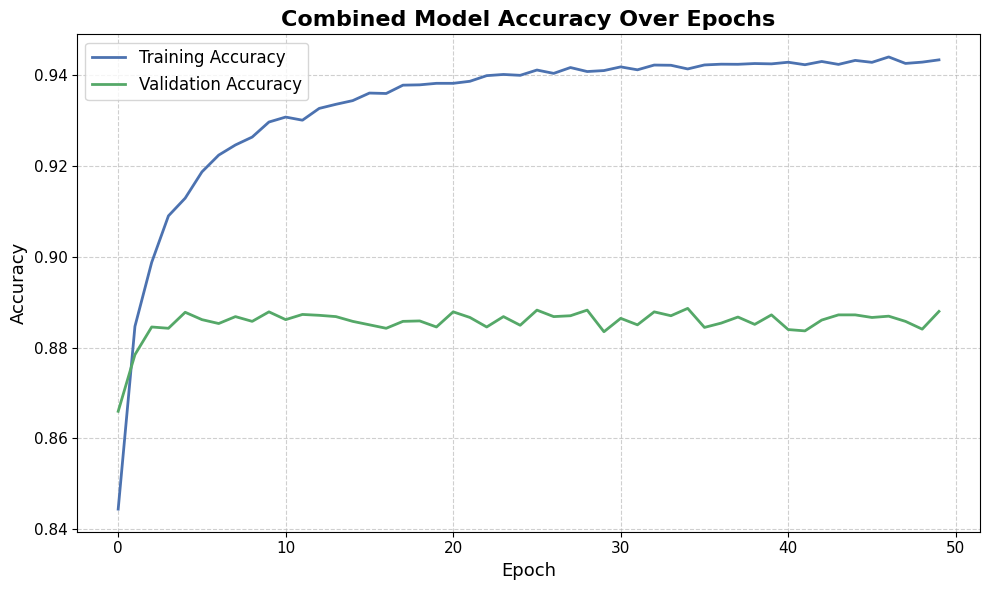

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(history_combined.history['accuracy'], label='Training Accuracy', color='#4C72B0', linewidth=2)
plt.plot(history_combined.history['val_accuracy'], label='Validation Accuracy', color='#55A868', linewidth=2)

plt.title('Combined Model Accuracy Over Epochs', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()


plt.show()



###Confusion Matrix

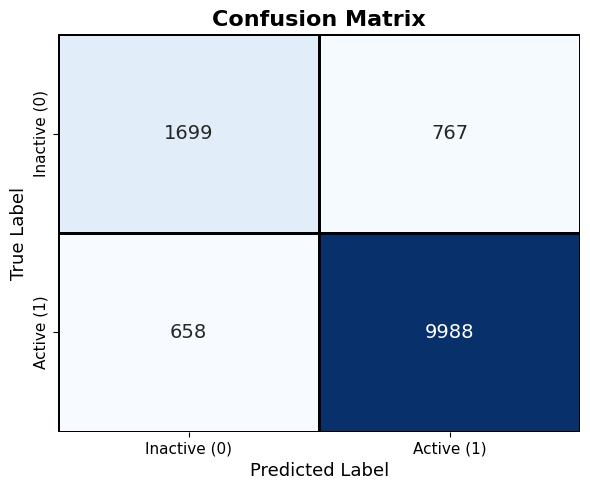

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)
labels = ['Inactive (0)', 'Active (1)']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            cbar=False, linewidths=1, linecolor='black', annot_kws={"size": 14})

plt.title('Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Label', fontsize=13)
plt.ylabel('True Label', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


###Bar Chart for Precision, Recall, F1-Score

<Figure size 1000x600 with 0 Axes>

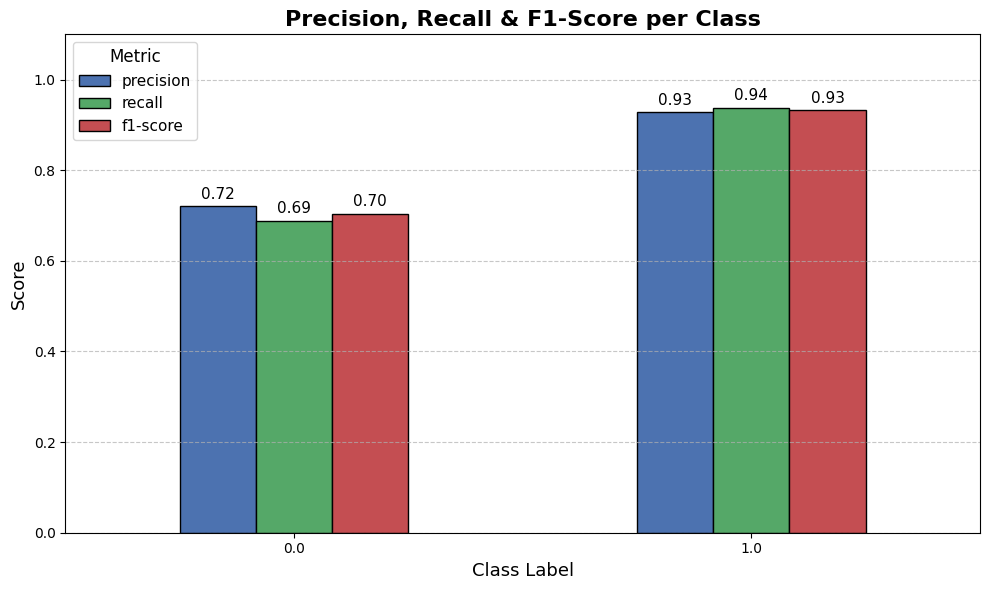

In [46]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

report_dict = classification_report(Y_test, Y_pred, output_dict=True)
df_metrics = pd.DataFrame(report_dict).transpose().iloc[:2]

plt.figure(figsize=(10, 6))
palette = ['#4C72B0', '#55A868', '#C44E52']

barplot = df_metrics[['precision', 'recall', 'f1-score']].plot(
    kind='bar',
    figsize=(10, 6),
    color=palette,
    edgecolor='black'
)

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', fontsize=11, padding=3)

plt.title('Precision, Recall & F1-Score per Class', fontsize=16, weight='bold')
plt.ylabel('Score', fontsize=13)
plt.xlabel('Class Label', fontsize=13)
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric', fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()



###ROC Curve (Receiver Operating Characteristic)

410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


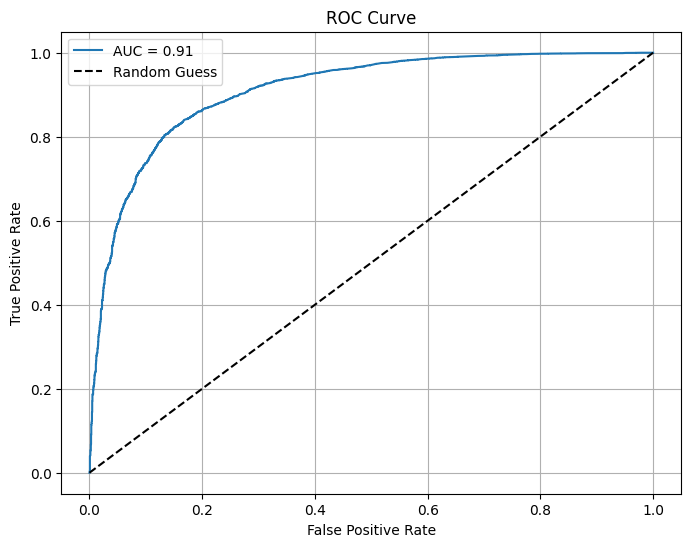

In [47]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(Y_test, model.predict(X_test_scaled))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


###Count Activity Class

<ipython-input-48-5d8312cf3b6c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, palette=['#FF6F61', '#6B5B95'], edgecolor='black', linewidth=1.2)
<ipython-input-48-5d8312cf3b6c>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Inactive (0)', 'Active (1)'], fontsize=12)


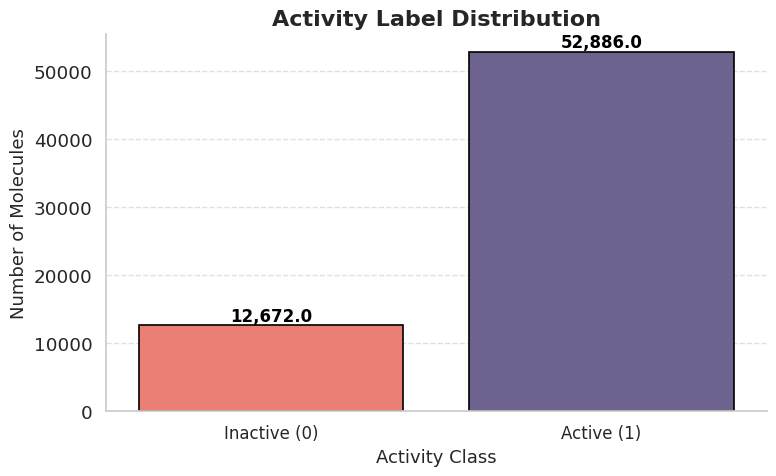

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(8, 5))
ax = sns.countplot(x=y, palette=['#FF6F61', '#6B5B95'], edgecolor='black', linewidth=1.2)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

plt.title('Activity Label Distribution', fontsize=16, weight='bold')
plt.xlabel('Activity Class', fontsize=13)
plt.ylabel('Number of Molecules', fontsize=13)
ax.set_xticklabels(['Inactive (0)', 'Active (1)'], fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()


plt.show()



###Training vs Validation — Accuracy & Loss

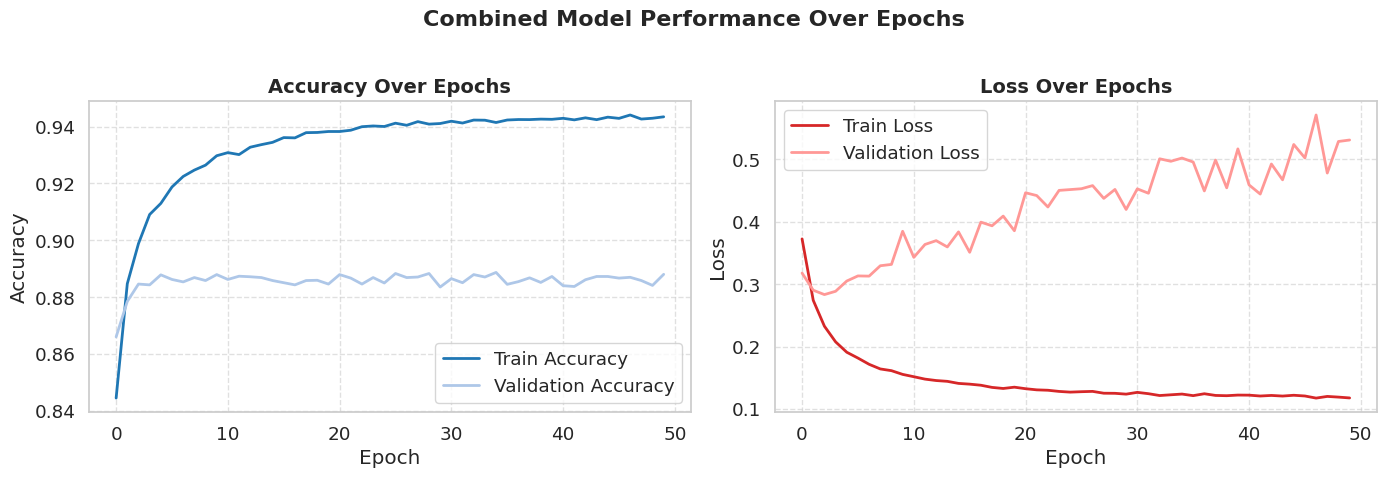

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 11})

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(history_combined.history['accuracy'], label='Train Accuracy', color='#1f77b4', linewidth=2)
axs[0].plot(history_combined.history['val_accuracy'], label='Validation Accuracy', color='#aec7e8', linewidth=2)
axs[0].set_title('Accuracy Over Epochs', fontsize=14, weight='bold')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[1].plot(history_combined.history['loss'], label='Train Loss', color='#d62728', linewidth=2)
axs[1].plot(history_combined.history['val_loss'], label='Validation Loss', color='#ff9896', linewidth=2)
axs[1].set_title('Loss Over Epochs', fontsize=14, weight='bold')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Combined Model Performance Over Epochs', fontsize=16, weight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()



###Pie chart for class activity

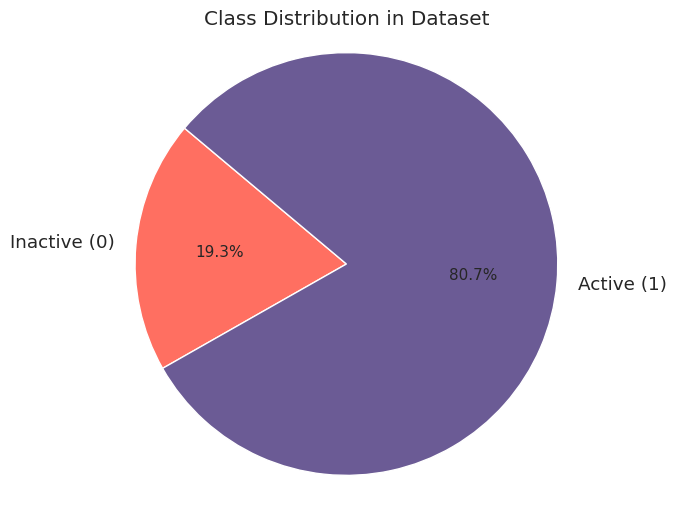

In [50]:
plt.figure(figsize=(6, 6))
labels = ['Inactive (0)', 'Active (1)']
sizes = y.value_counts().sort_index()
colors = ['#FF6F61', '#6B5B95']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Class Distribution in Dataset')
plt.axis('equal')
plt.show()
